In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [5]:
TRAIN_DIR = r"C:\Users\kaileshwar\Downloads\M5\images\train"
TEST_DIR = r"C:\Users\kaileshwar\Downloads\M5\images\test"

In [6]:
import os

def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                image_path = os.path.join(label_dir, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "Completed")
        else:
            print(f"Skipping {label_dir} as it is not a directory.")
            
    return image_paths, labels


In [7]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\kaileshwar\Downloads\M5\images\train\...,fear
1,C:\Users\kaileshwar\Downloads\M5\images\train\...,neutral
2,C:\Users\kaileshwar\Downloads\M5\images\train\...,surprise
3,C:\Users\kaileshwar\Downloads\M5\images\train\...,angry
4,C:\Users\kaileshwar\Downloads\M5\images\train\...,neutral


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\kaileshwar\Downloads\M5\images\test\a...,angry
1,C:\Users\kaileshwar\Downloads\M5\images\test\a...,angry
2,C:\Users\kaileshwar\Downloads\M5\images\test\a...,angry
3,C:\Users\kaileshwar\Downloads\M5\images\test\a...,angry
4,C:\Users\kaileshwar\Downloads\M5\images\test\a...,angry


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

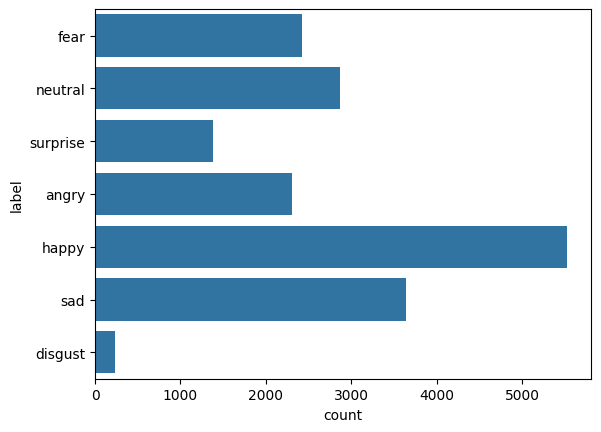

In [9]:
sns.countplot(train['label'])

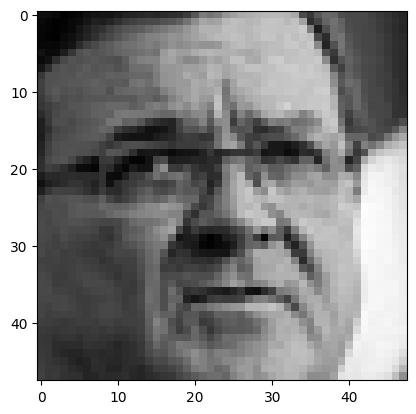

In [10]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

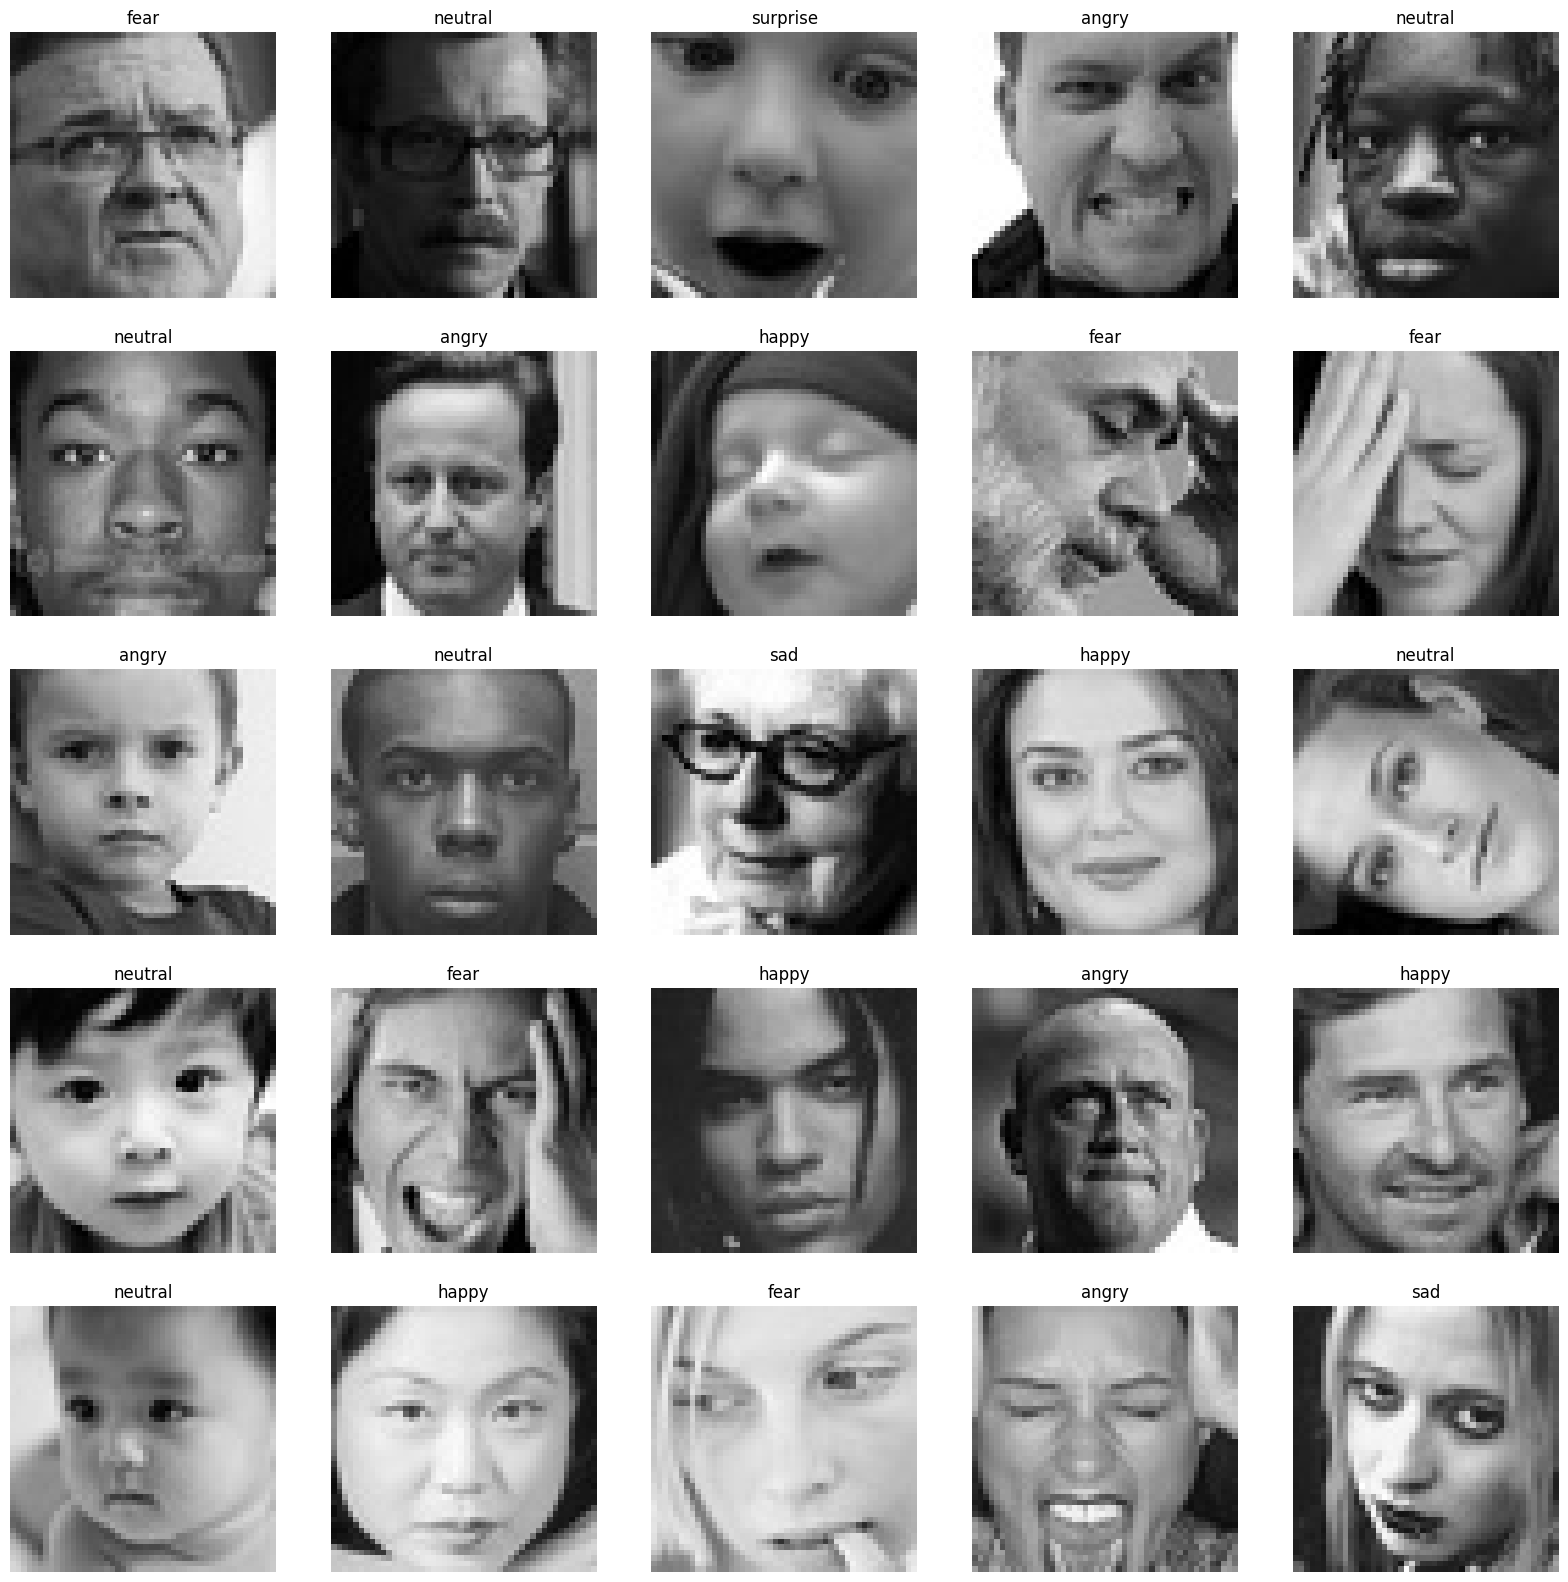

In [11]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [15]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.])

In [16]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [19]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
144/144 [==============================] - 100s 692ms/step - loss: 1.6513 - accuracy: 0.3424 - val_loss: 1.6877 - val_accuracy: 0.3329
Epoch 2/50
144/144 [==============================] - 99s 684ms/step - loss: 1.5625 - accuracy: 0.3906 - val_loss: 1.6765 - val_accuracy: 0.3460
Epoch 3/50
144/144 [==============================] - 98s 682ms/step - loss: 1.4748 - accuracy: 0.4286 - val_loss: 1.5578 - val_accuracy: 0.3992
Epoch 4/50
144/144 [==============================] - 98s 683ms/step - loss: 1.4206 - accuracy: 0.4501 - val_loss: 1.4943 - val_accuracy: 0.4226
Epoch 5/50
144/144 [==============================] - 99s 690ms/step - loss: 1.3820 - accuracy: 0.4727 - val_loss: 1.4804 - val_accuracy: 0.4396
Epoch 6/50
144/144 [==============================] - 98s 679ms/step - loss: 1.3438 - accuracy: 0.4825 - val_loss: 1.4672 - val_accuracy: 0.4461
Epoch 7/50
144/144 [==============================] - 98s 679ms/step - loss: 1.3183 - accuracy: 0.4925 - val_loss: 1.4522 - val_a

In [ ]:
# Save the model
model.save(r"C:\Users\Acer\Downloads\M5\model_name.h5")


In [18]:
from keras.models import load_model

# Load the model
model = load_model(r"C:\Users\kaileshwar\Downloads\M5\model_name.h5")


## Plot the Results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

Original Output: angry
1/1 [==============================] - 0s 39ms/step
Predicted Output: angry


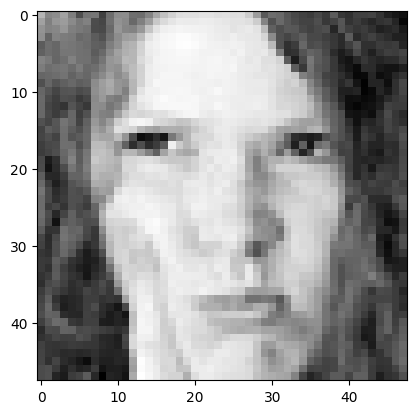

In [22]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 [==============================] - 0s 38ms/step
Predicted Output: neutral


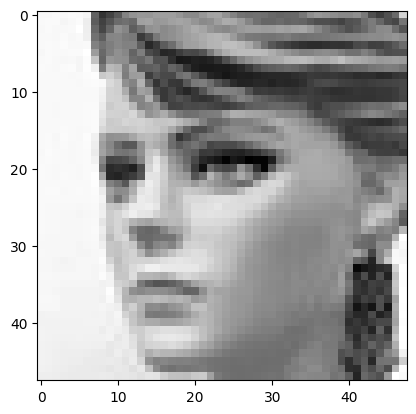

In [27]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 42ms/step
Predicted Output: sad


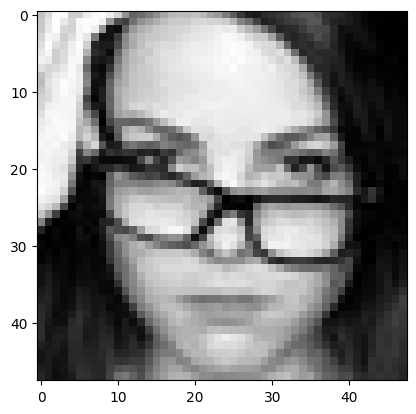

In [22]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 [==============================] - 0s 64ms/step
Predicted Output: happy


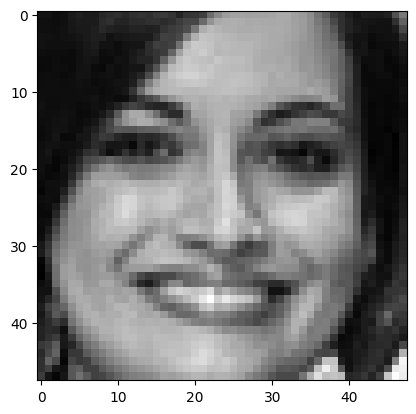

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 [==============================] - 0s 53ms/step
Predicted Output: angry


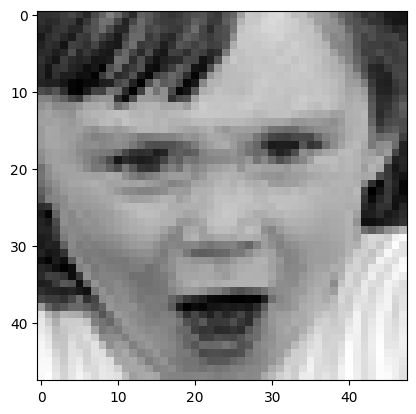

In [28]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [19]:
from keras.models import load_model

# Load the model
model = load_model(r"C:\Users\kaileshwar\Downloads\M5\model_name.h5")


In [20]:
from keras.preprocessing import image
import numpy as np

def predict_emotion(file_path, model):
    # Load and preprocess the image
    img = image.load_img(file_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the emotion
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotion_prediction = model.predict(img_array)
    predicted_emotion = emotion_labels[np.argmax(emotion_prediction)]

    return predicted_emotion


In [ ]:
# Load the model
model = load_model(r"C:\Users\Acer\Downloads\M5\model_name.h5")

# Path to the image file
image_path = r"C:\Users\Acer\Downloads\M5\ddf70db78b0f3ee2388cedbdd66f93e0.jpg"

# Predict the emotion
predicted_emotion = predict_emotion(image_path, model)
print("Predicted Emotion:", predicted_emotion)


In [22]:
# Load the model
model = load_model(r"C:\Users\kaileshwar\Downloads\M5\model_name.h5")

# Path to the image file
image_path = r"C:\Users\kaileshwar\Downloads\M5\images\test\happy\2076.jpg"

# Predict the emotion
predicted_emotion = predict_emotion(image_path, model)
print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Predicted Emotion: Happy


Original Output: sad
1/1 [==============================] - 0s 35ms/step
Predicted Output: sad


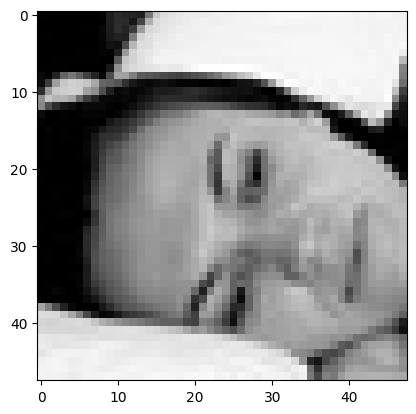

In [23]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 27ms/step
Predicted Output: neutral


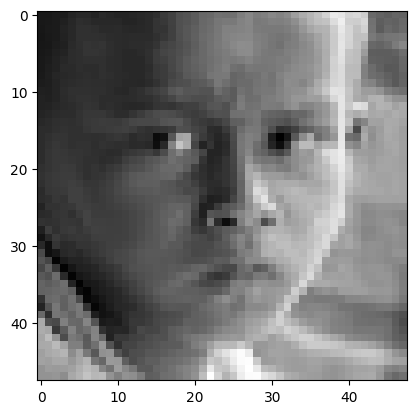

In [24]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 [==============================] - 1s 524ms/step
Predicted Output: happy


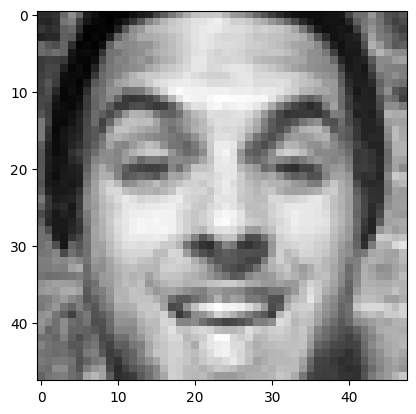

In [21]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

106/106 [==============================] - 7s 68ms/step


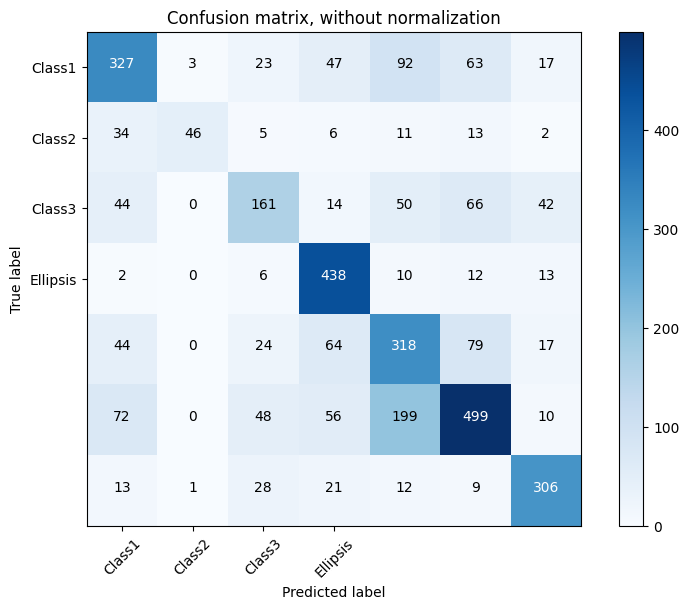

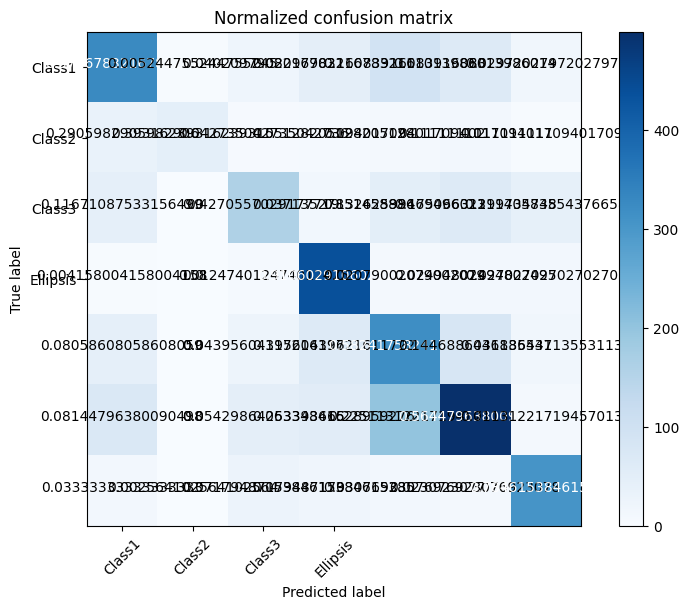

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming you have your test data and labels loaded as X_test and y_test
# Assuming you have your test data and labels loaded

# Step 1: Load your test data and labels
# Replace 'load_test_data()' and 'load_test_labels()' with your actual functions to load the test data and labels
X_test = test_features/255.0
y_test = to_categorical(y_test, num_classes=7)

# Step 2: Predict labels on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot confusion matrix
# (code for plotting confusion matrix remains the same)


# Step 4: Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define class labels (if you haven't already)
class_labels = ["Class1", "Class2", "Class3", ...]

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=class_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=class_labels, normalize=True, title='Normalized confusion matrix')

plt.show()


In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import load_model

# Assuming you have loaded your model and test data:
model = load_model(r"C:\Users\Acer\Downloads\M5\model_name.h5")

# Get predictions for the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Since y_test is one-hot encoded, convert it back to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # 'macro' averages over classes
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


106/106 [==============================] - 7s 59ms/step
Accuracy: 0.6222156222156222
Precision: 0.6626643633816872
Recall: 0.6048588476290592
F1 Score: 0.6133382321142873


In [18]:
model = Sequential()


In [19]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


In [20]:
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


In [21]:
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


In [22]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation='softmax'))


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Define the input shape
input_shape = (48, 48, 1)
output_class = 7

# Initialize the Sequential model
model = Sequential()

# Add model layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 10, 10, 256)      

In [1]:
from keras.preprocessing import image
import numpy as np

def predict_emotion(file_path, model):
    # Load and preprocess the image
    img = image.load_img(file_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the emotion
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotion_prediction = model.predict(img_array)
    predicted_emotion = emotion_labels[np.argmax(emotion_prediction)]

    return predicted_emotion

In [2]:

model = load_model(r"C:\Users\kaileshwar\Downloads\M5\model_name.h5")


image_path = r"C:\Users\kaileshwar\Downloads\M5\images\test\happy\2076.jpg"

predicted_emotion = predict_emotion(image_path, model)
print("Predicted Emotion:", predicted_emotion)

NameError: name 'load_model' is not defined